<a href="https://colab.research.google.com/github/AliDarwish2025/task_mind_ai_ML/blob/main/Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Shape: (80000, 14)
    age  hypertension  heart_disease    bmi  HbA1c_level  blood_glucose_level  \
0  80.0             0              1  25.19          6.6                  140   
1  54.0             0              0  27.32          6.6                   80   
2  28.0             0              0  27.32          5.7                  158   
3  36.0             0              0  23.45          5.0                  155   
4  76.0             1              1  20.14          4.8                  155   

   diabetes  gender_Male  gender_Other  smoking_history_current  \
0         0        False         False                    False   
1         0        False         False                    False   
2         0         True         False                    False   
3         0        False         False                     True   
4         0         True         False                     True   

   smoking_history_ever  smoking_history_former  smoking_history_never  \
0           

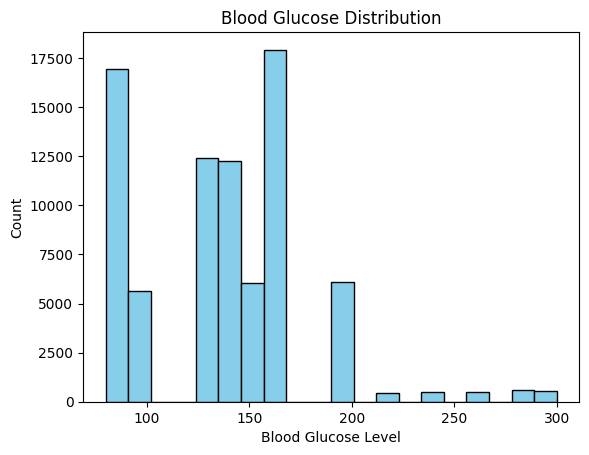

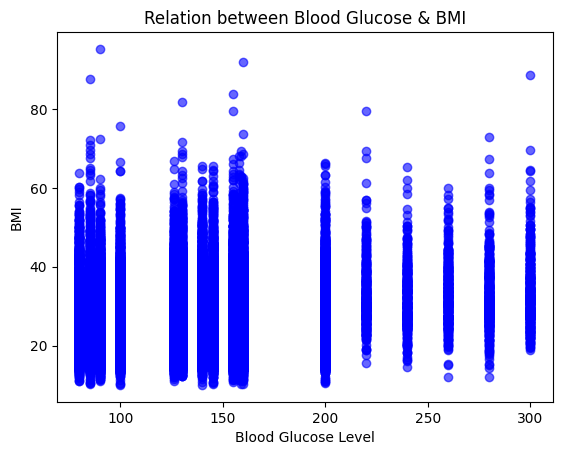

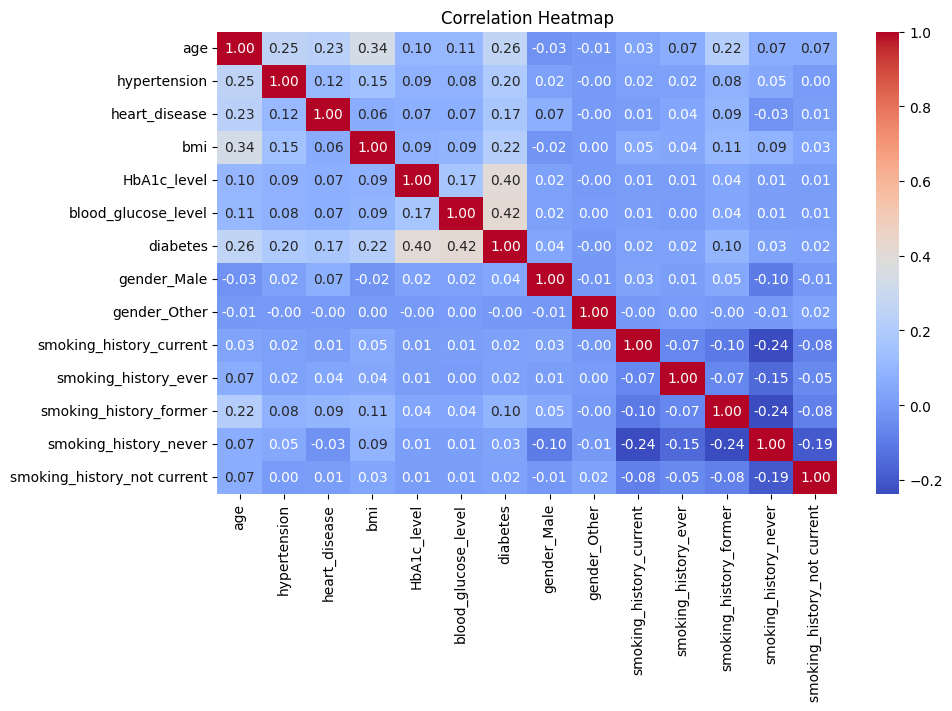

F1 Score: 0.8042049934296978

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     14635
           1       1.00      0.67      0.80      1365

    accuracy                           0.97     16000
   macro avg       0.99      0.84      0.89     16000
weighted avg       0.97      0.97      0.97     16000



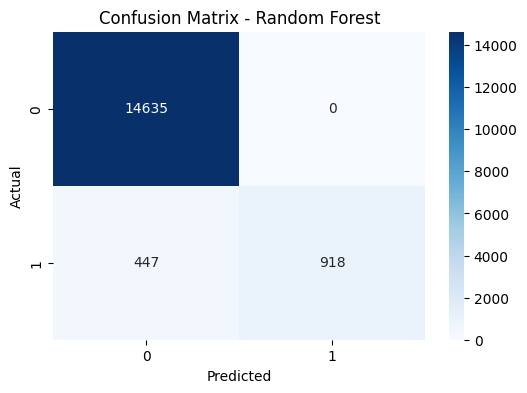

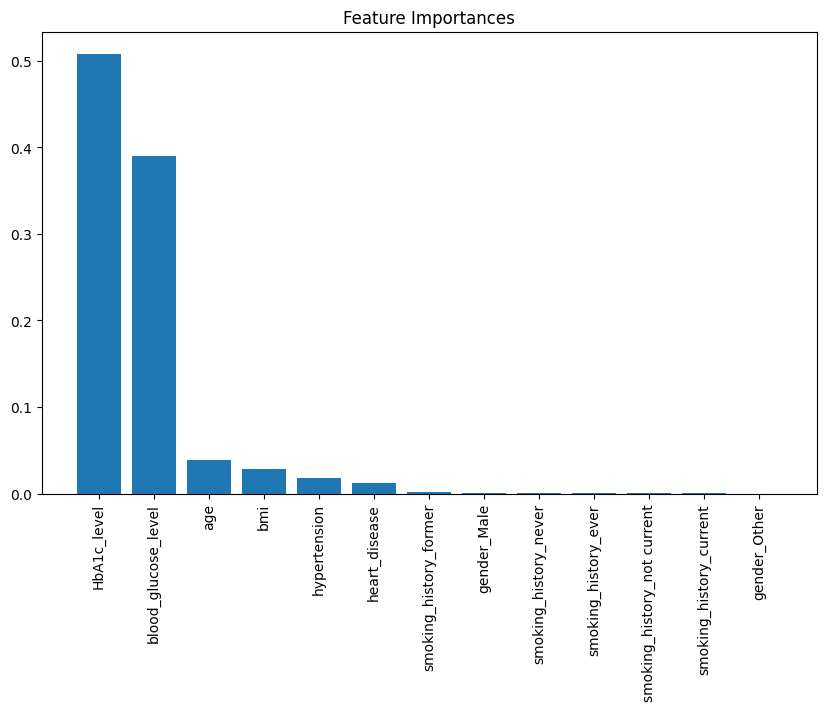

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix, classification_report

# قراءة البيانات
df = pd.read_csv("train_Data.csv")
df_test = pd.read_csv("test_Data.csv")

# تنظيف البيانات
if "Unnamed: 0" in df.columns:
    df.drop(columns=["Unnamed: 0"], inplace=True)
if "Unnamed: 0" in df_test.columns:
    df_test.drop(columns=["Unnamed: 0"], inplace=True)

df = pd.get_dummies(df, drop_first=True)
df_test = pd.get_dummies(df_test, drop_first=True)

df.dropna(inplace=True)
df_test.dropna(inplace=True)

# معلومات عن البيانات
print("Data Shape:", df.shape)
print(df.head())
print(df.info())
print(df.describe())

# EDA
plt.hist(df["blood_glucose_level"], bins=20, color="skyblue", edgecolor="black")
plt.title("Blood Glucose Distribution")
plt.xlabel("Blood Glucose Level")
plt.ylabel("Count")
plt.show()

plt.scatter(df["blood_glucose_level"], df["bmi"], color="blue", alpha=0.6)
plt.xlabel("Blood Glucose Level")
plt.ylabel("BMI")
plt.title("Relation between Blood Glucose & BMI")
plt.show()

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# فصل الـ Features والـ Target
X = df.drop("diabetes", axis=1)
y = df["diabetes"]

# تقسيم Train/Test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scaling (اختياري)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# تدريب Random Forest
model = RandomForestClassifier(
    n_estimators=100,   # عدد الأشجار
    max_depth=8,       # عمق الشجرة
    random_state=42
)
model.fit(X_train, y_train)

# التوقعات
y_pred = model.predict(X_test)

# تقييم الأداء
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# مصفوفة الالتباس
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# أهمية الخصائص (Feature Importance)
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10,6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.show()
